In [33]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset


# Display the data table for preview
data_complete = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])
data_complete.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [34]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = data_complete.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = mean_tumor_volume.to_frame().reset_index()
# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [35]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = data_complete.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
sem_tumor_volume_df = sem_tumor_volume.to_frame().reset_index()
# Preview DataFrame
sem_tumor_volume_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [36]:
# Minor Data Munging to Re-Format the Data Frames

pivot_tumor_timepoint_drug_volume = mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
pivot_tumor_timepoint_drug_volume.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [37]:
drug_list = []
dic_drug_volume = {}
dic_sem = {}

tumor_volume_list = []
lst = []
sem_lst = []

drug_list = ['Capomulin', 'Infubinol','Ketapril','Placebo']

for i in range(len(drug_list)):
    
    new_df = mean_tumor_volume_df.loc[(mean_tumor_volume_df["Drug"]==drug_list[i])]["Tumor Volume (mm3)"]
    new_df = new_df.to_frame().reset_index()
    new_df = new_df['Tumor Volume (mm3)'].rename("tumor_volume")
    new_df = new_df.to_frame().reset_index()
    tumor_volume_list.append(list(new_df.tumor_volume))
   
    dic_drug_volume[drug_list[i]] = tumor_volume_list[i]   

    sem_new_df = sem_tumor_volume_df.loc[(sem_tumor_volume_df["Drug"]==drug_list[i])]["Tumor Volume (mm3)"]
    sem_new_df = sem_new_df.to_frame().reset_index()
    sem_new_df = sem_new_df['Tumor Volume (mm3)'].rename("tumor_volume")
    sem_new_df = sem_new_df.to_frame().reset_index()
    sem_lst.append(list(sem_new_df.tumor_volume))
   
    dic_sem[drug_list[i]] = sem_lst[i]     


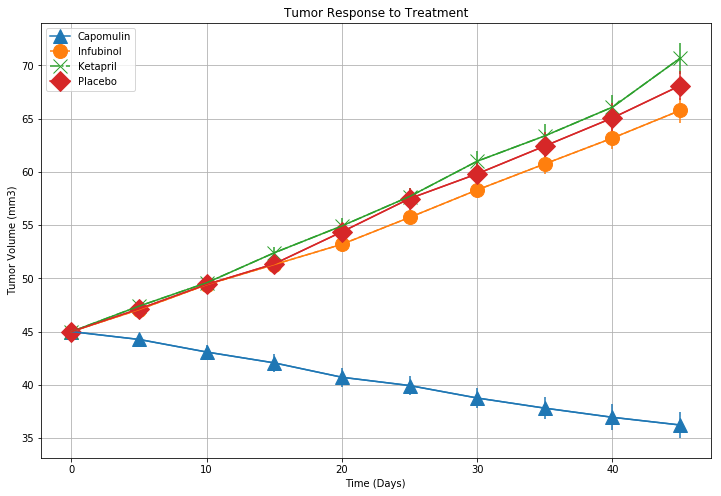

In [6]:
# Generate the Plot (with Error Bars)

x_axis = [0,5,10,15,20,25,30,35,40,45]

df = pd.DataFrame(dic_drug_volume, index = x_axis)


errors = pd.DataFrame(dic_sem, index = x_axis)

#plot error bars
ax = df.plot(figsize=(12,8), yerr = errors, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)

df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, ax = ax).grid()


#x_lim = len(tumor_response_pivot.index)
#pivot_tumor_timepoint_drug_volume

# Chart title
plt.title("Tumor Response to Treatment")

# x label
plt.xlabel("Time (Days)")

# y label
plt.ylabel("Tumor Volume (mm3)")


# Save the Figure
plt.savefig('tumor_vol_mean_sem.png', dpi=200)


{'Capomulin': 0    45.000000
 1    44.266086
 2    43.084291
 3    42.064317
 4    40.716325
 5    39.939528
 6    38.769339
 7    37.816839
 8    36.958001
 9    36.236114
 Name: Tumor Volume (mm3), dtype: float64, 'Ceftamin': 10    45.000000

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_mem_site = data_complete.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
mean_mem_site_df = mean_mem_site.to_frame().reset_index()

# Preview DataFrame
mean_mem_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_mem_site = data_complete.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
sem_mem_site_df = sem_mem_site.to_frame().reset_index()

# Preview DataFrame
sem_mem_site_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
pivot_metastatic_sites = sem_mem_site_df.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
pivot_metastatic_sites.head()



Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [10]:
# Generate the Plot (with Error Bars)


dic_drug_volume = {}
dic_sem = {}

drug_list = []
tumor_volume_list = []
lst = []
sem_lst = []

drug_list = ['Capomulin', 'Infubinol','Ketapril','Placebo']

for i in range(len(drug_list)):
      
    new_df = mean_mem_site_df.loc[(mean_mem_site_df["Drug"]==drug_list[i])]["Metastatic Sites"]
    new_df = new_df.to_frame().reset_index()
    new_df = new_df['Metastatic Sites'].rename("metastatic_sites")
    new_df = new_df.to_frame().reset_index()
    tumor_volume_list.append(list(new_df.metastatic_sites))
   
    dic_drug_volume[drug_list[i]] = tumor_volume_list[i]
    
    
    sem_new_df = sem_mem_site_df.loc[(sem_mem_site_df["Drug"]==drug_list[i])]["Metastatic Sites"]
    sem_new_df = sem_new_df.to_frame().reset_index()
    sem_new_df = sem_new_df['Metastatic Sites'].rename("metastatic_sites")
    sem_new_df = sem_new_df.to_frame().reset_index()
    sem_lst.append(list(sem_new_df.metastatic_sites))
   
    dic_sem[drug_list[i]] = sem_lst[i]     


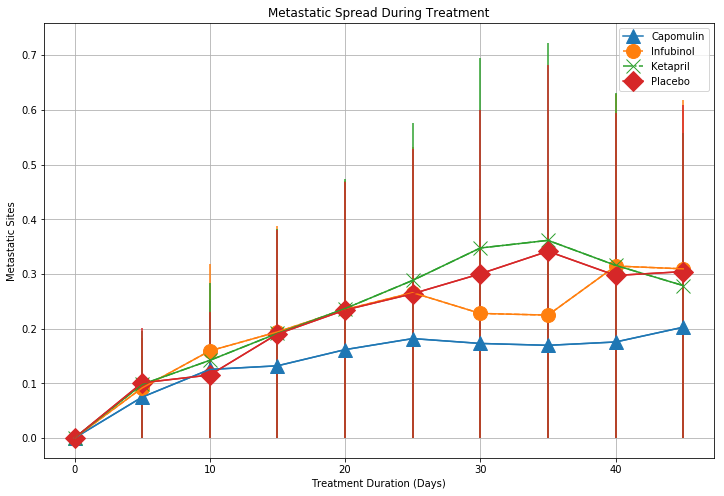

In [11]:
# Generate the Plot (with Error Bars)

x_axis = [0,5,10,15,20,25,30,35,40,45]

df = pd.DataFrame(dic_drug_volume, index = x_axis)


errors = pd.DataFrame(dic_sem, index = x_axis)

#plot error bars
ax = df.plot(figsize=(12,8), yerr = errors, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)

df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, ax = ax).grid()


#x_lim = len(tumor_response_pivot.index)
#pivot_tumor_timepoint_drug_volume

# Chart title
plt.title("Metastatic Spread During Treatment")

# x label
plt.xlabel("Treatment Duration (Days)")

# y label
plt.ylabel("Metastatic Sites")


# Save the Figure
plt.savefig('Metastatic_sites_mean_sem.png', dpi=300)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

count_mem_site = data_complete.groupby(['Drug','Timepoint'])['Metastatic Sites'].count()

# Convert to DataFrame
count_mem_site_df = count_mem_site.to_frame().reset_index()


# Preview DataFrame
count_mem_site_df.head()




,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames

pivot_count_mem_site_df = count_mem_site_df.pivot(index='Timepoint', columns='Drug')

# Preview the Data Frame
pivot_count_mem_site_df.head()


Metastatic Sites                                               \
Drug             Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint                                                                 
0                       25       25        25       25       25      25   
5                       25       21        25       23       23      24   
10                      25       20        21       22       21      24   
15                      24       19        21       19       21      20   
20                      23       18        20       19       20      19   

                                                
Drug      Propriva Ramicane Stelasyn Zoniferol  
Timepoint                                       
0               26       25       26        25  
5               25       25       25        24  
10              23       24       23        22  
15              17       24       23        21  
20              17       23       21        17

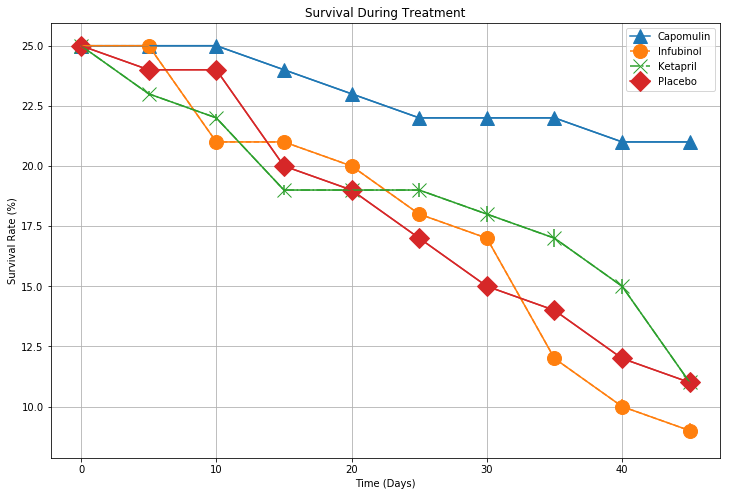

In [14]:
# Generate the Plot (Accounting for percentages)

# Generate the Plot (with Error Bars)


dic_drug_volume = {}
dic_sem = {}

drug_list = []
tumor_volume_list = []
lst = []
sem_lst = []

drug_list = ['Capomulin', 'Infubinol','Ketapril','Placebo']

for i in range(len(drug_list)):
      
    new_df = count_mem_site_df.loc[(count_mem_site_df["Drug"]==drug_list[i])]["Metastatic Sites"]
    new_df = new_df.to_frame().reset_index()
    new_df = new_df['Metastatic Sites'].rename("metastatic_sites")
    new_df = new_df.to_frame().reset_index()
    tumor_volume_list.append(list(new_df.metastatic_sites))
   
    dic_drug_volume[drug_list[i]] = tumor_volume_list[i]
    
    
    sem_new_df = sem_mem_site_df.loc[(sem_mem_site_df["Drug"]==drug_list[i])]["Metastatic Sites"]
    sem_new_df = sem_new_df.to_frame().reset_index()
    sem_new_df = sem_new_df['Metastatic Sites'].rename("metastatic_sites")
    sem_new_df = sem_new_df.to_frame().reset_index()
    sem_lst.append(list(sem_new_df.metastatic_sites))
   
    dic_sem[drug_list[i]] = sem_lst[i]     


    
    
    
    
    
# Generate the Plot (with Error Bars)

x_axis = [0,5,10,15,20,25,30,35,40,45]

df = pd.DataFrame(dic_drug_volume, index = x_axis)


errors = pd.DataFrame(dic_sem, index = x_axis)

#plot error bars
ax = df.plot(figsize=(12,8), yerr = errors, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)

df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, ax = ax).grid()


#x_lim = len(tumor_response_pivot.index)
#pivot_tumor_timepoint_drug_volume

# Chart title
plt.title("Survival During Treatment")

# x label
plt.xlabel("Time (Days)")

# y label
plt.ylabel("Survival Rate (%)")


# Save the Figure
plt.savefig('Metastatic_sites_mean_sem.png', dpi=300)

## Summary Bar Graph

In [30]:
# Calculate the percent changes for each drug
tumor_volume_change_percentage =  ((pivot_tumor_timepoint_drug_volume.iloc[-1]-pivot_tumor_timepoint_drug_volume.iloc[0])/pivot_tumor_timepoint_drug_volume.iloc[0]) * 100


# Display the data to confirm
tumor_volume_change_percentage



                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

In [31]:


tumor_volume_change_percentage.index
drug = list(tumor_volume_change_percentage.index)
drug


[('Tumor Volume (mm3)', 'Capomulin'),
 ('Tumor Volume (mm3)', 'Ceftamin'),
 ('Tumor Volume (mm3)', 'Infubinol'),
 ('Tumor Volume (mm3)', 'Ketapril'),
 ('Tumor Volume (mm3)', 'Naftisol'),
 ('Tumor Volume (mm3)', 'Placebo'),
 ('Tumor Volume (mm3)', 'Propriva'),
 ('Tumor Volume (mm3)', 'Ramicane'),
 ('Tumor Volume (mm3)', 'Stelasyn'),
 ('Tumor Volume (mm3)', 'Zoniferol')]

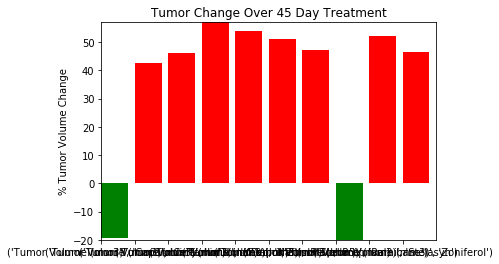

In [32]:



tumor_percent_change = list(tumor_volume_change_percentage.values)



colors = ['r' if tpc > 0 else 'g' for tpc in tumor_percent_change]
#colors

x_axis = np.arange(len(tumor_percent_change))
#x_axis

plt.bar(x_axis, tumor_percent_change, color = colors, align="edge")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, tumor_volume_change_percentage.index)


plt.xlim(0, len(x_axis))

plt.ylim(-20, max(tumor_volume_change_percentage.values))

plt.title("Tumor Change Over 45 Day Treatment")

plt.ylabel("% Tumor Volume Change")

plt.savefig("% Tumor Volume Change")
#df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, ax = ax).grid()


